************** Baseline MAPE: 16.69% *****************


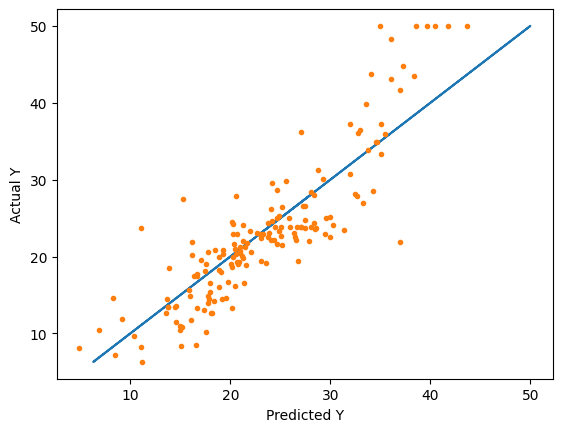

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


# load the dataset
df = pd.read_csv('housing.csv')
# split into input and output elements
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mape = mean_absolute_percentage_error(y_test, yhat)
print(f'************** Baseline MAPE: {mape*100:.2f}% *****************')

plt.plot(y_test, y_test)  # baseline
plt.plot(yhat, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()


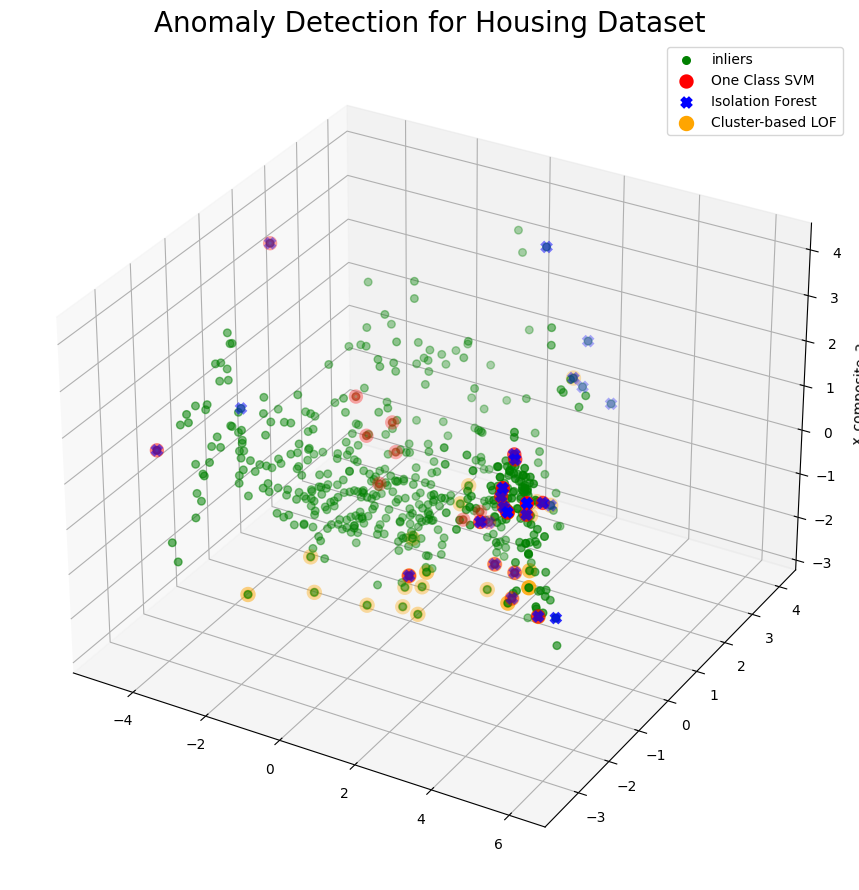

In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')


# load the dataset
df = pd.read_csv('housing.csv')
df = df.iloc[:, :-1]

# Outlier Detection
classifier_dict = {"One-Class SVM": OneClassSVM(nu=0.05),
                   "Isolation Forest": IsolationForest(contamination=0.05),
                   "Cluster-based LOF": LocalOutlierFactor(contamination=0.05)}
Outliers = pd.DataFrame()
for i, (clf_name, clf) in enumerate(classifier_dict.items()):
    clf.fit(df)
    df["anomaly"] = clf.fit_predict(df)
    outliers_subset = df[df.anomaly == -1]
    outliers_subset = outliers_subset.assign(model = clf_name)
    Outliers = pd.concat([Outliers, outliers_subset], axis=0, ignore_index=False)

pca = PCA(n_components=3) # reduce to k=3 dimensions
scaler = StandardScaler()
X = scaler.fit_transform(df)
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(111, projection="3d")
ax.set_zlabel("x_composite_3")
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=30, lw=1, label="inliers",c="green")
ax.scatter(X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 0],
           X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 1],
           X_reduce[Outliers[Outliers['model']=='One-Class SVM'].index, 2],
           lw=4, s=40, c="red", label="One Class SVM")
ax.scatter(X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 0],
           X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 1],
           X_reduce[Outliers[Outliers['model']=='Isolation Forest'].index, 2],
           lw=4, s=40, marker='x', c="blue", label="Isolation Forest")
ax.scatter(X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 0],
           X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 1],
           X_reduce[Outliers[Outliers['model']=='Cluster-based LOF'].index, 2],
           lw=4, s=50, c="orange", label="Cluster-based LOF")
plt.title("Anomaly Detection for Housing Dataset", fontsize=20)
plt.legend()
plt.tight_layout()


Initial shape of the training dataset (339, 13) (339,)
Shape of the training dataset after removing outliers (305, 13) (305,)
*********** Isolation Forest MAPE: 15.24% *************


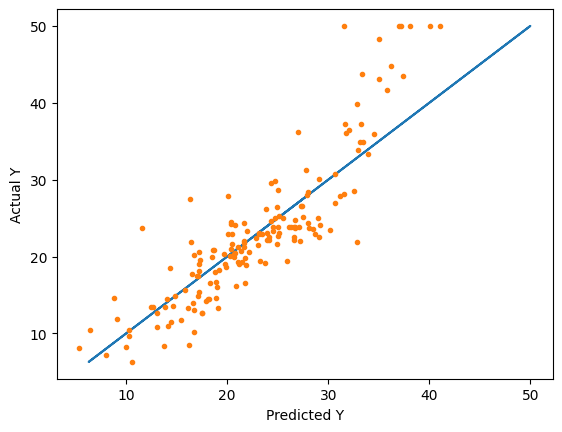

In [12]:
df = pd.read_csv('housing.csv')
# split into input and output elements
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset', X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
x_out = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Shape of the training dataset after removing outliers', X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat1 = model.predict(X_test)
# evaluate predictions
mape = mean_absolute_percentage_error(y_test, yhat1)
print(f'*********** Isolation Forest MAPE: {mape*100:.2f}% *************')

plt.plot(y_test, y_test)  # baseline
plt.plot(yhat1, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()


Initial shape of the training dataset (339, 13) (339,)
Shape of the training dataset after removing outliers (305, 13) (305,)
******* Local Outlier Factor MAPE: 16.39% **********


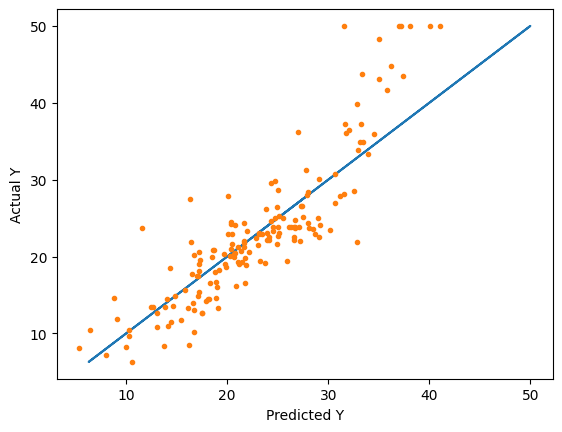

In [13]:
# load the dataset
df = pd.read_csv('housing.csv')
# split into input and output elements
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset', X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor(contamination=0.1)
x_out = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Shape of the training dataset after removing outliers', X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat3 = model.predict(X_test)
# evaluate predictions
mape = mean_absolute_percentage_error(y_test, yhat3)
print(f'******* Local Outlier Factor MAPE: {mape*100:.2f}% **********')

plt.plot(y_test, y_test)  # baseline
plt.plot(yhat1, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()


Initial shape of the training dataset (339, 13) (339,)
Shape of the training dataset after removing outliers (305, 13) (305,)
********** One-class SVM MAPE: 16.80% **********


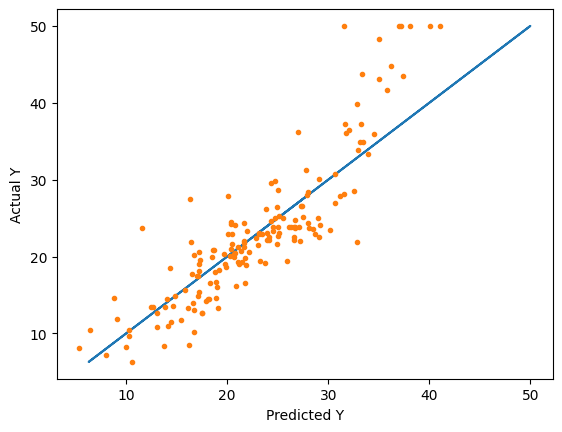

In [14]:
df = pd.read_csv('housing.csv')
# split into input and output elements
X, y = df.iloc[:, :-1], df.iloc[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print('Initial shape of the training dataset', X_train.shape, y_train.shape)
# identify outliers in the training dataset
svm = OneClassSVM(nu=0.1)
x_out = svm.fit_predict(X_train)
# select all rows that are not outliers
mask = (x_out != -1)
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]
# summarize the shape of the updated training dataset
print('Shape of the training dataset after removing outliers', X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat4 = model.predict(X_test)
# evaluate predictions
mape = mean_absolute_percentage_error(y_test, yhat4)
print(f'********** One-class SVM MAPE: {mape*100:.2f}% **********')

plt.plot(y_test, y_test)  # baseline
plt.plot(yhat1, y_test, '.')  # actual vs. prediction
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')
plt.show()


Counter({0: 9900, 1: 100})


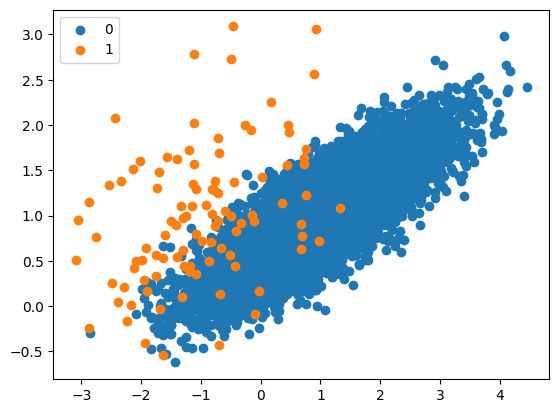

In [15]:
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# randomly generate an imbalanced dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       0.99      1.00      1.00      2480
     class 1       0.88      0.35      0.50        20

    accuracy                           0.99      2500
   macro avg       0.93      0.67      0.75      2500
weighted avg       0.99      0.99      0.99      2500



In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       0.83      0.73      0.78        26
     class 1       0.74      0.83      0.78        24

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.79      0.78      0.78        50



In [18]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       0.89      0.91      0.90      2485
     class 1       0.91      0.88      0.90      2465

    accuracy                           0.90      4950
   macro avg       0.90      0.90      0.90      4950
weighted avg       0.90      0.90      0.90      4950



In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       0.89      0.93      0.91      2485
     class 1       0.93      0.88      0.90      2465

    accuracy                           0.91      4950
   macro avg       0.91      0.91      0.91      4950
weighted avg       0.91      0.91      0.91      4950



Counter({0: 9900, 1: 100})


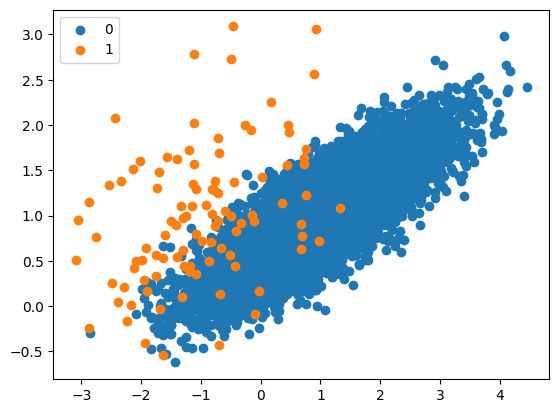

In [29]:
X_smote, y_smote = smote.fit_resample(X, y)

X_smote, y_smote = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y_smote)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_smote == label)[0]
    plt.scatter(X_smote[row_ix, 0], X_smote[row_ix, 1], label=str(label))
plt.legend()
plt.show()


In [20]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=102)
# define model
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_train, y_train)
# make prediction
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       1.00      0.92      0.96      2480
     class 1       0.08      0.95      0.16        20

    accuracy                           0.92      2500
   macro avg       0.54      0.93      0.56      2500
weighted avg       0.99      0.92      0.95      2500



In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
from xgboost import XGBClassifier

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=102)
# define model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
# make prediction
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred,
      target_names=['class 0', 'class 1']))


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      2480
     class 1       0.61      0.55      0.58        20

    accuracy                           0.99      2500
   macro avg       0.80      0.77      0.79      2500
weighted avg       0.99      0.99      0.99      2500

